In [1]:
import gym
from dqn_agent import DQN_Agent
from double_dqn_agent import Double_DQN_Agent
from agent_handler import Agent_handler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2023-11-18 23:35:19.325421: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 23:35:19.416129: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 23:35:19.416199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 23:35:19.418707: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-18 23:35:19.432732: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 23:35:19.433706: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
def plot_results(results, agent_name, smoothing=1):
    episode_steps = [result[1] for result in results]
    episode_returns = [result[2] for result in results]

    flat_steps = [item for sublist in episode_steps for item in sublist]
    flat_returns = [item for sublist in episode_returns for item in sublist]

    moving_avg_steps = np.convolve(flat_steps, np.ones(smoothing)/smoothing, mode='valid')
    moving_avg_returns = np.convolve(flat_returns, np.ones(smoothing)/smoothing, mode='valid')

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(moving_avg_steps)
    plt.title(f'{agent_name} - Episode Steps')
    plt.xlabel('Step')
    plt.ylabel(f'Smoothed Steps (smoothing={smoothing})')

    plt.subplot(1, 2, 2)
    plt.plot(moving_avg_returns)
    plt.title(f'{agent_name} - Episode Returns')
    plt.xlabel('Step')
    plt.ylabel(f'Smoothed Returns (smoothing={smoothing})')

    plt.tight_layout()
    plt.show()

In [3]:
def describe_env(env: gym.Env):
    num_actions = env.action_space.n
    obs = env.observation_space
    num_obs = env.observation_space.shape

    print("Observation space: ", obs)
    print("Observation space size: ", num_obs)
    print("Number of actions: ", num_actions)

    return num_obs, num_actions

In [4]:
def plot(results, result_index, window_size, title):
  plt.figure(figsize=(25, 10))

  for result in results:
      sns.lineplot(np.convolve(result[result_index], np.ones(window_size) / window_size, mode='same'), label=f"(LR, EF) {(result[3]) }")
      
  plt.title(title)
  plt.legend()
  plt.show()

In [5]:

env = gym.make('MsPacman-v4')

num_obs, num_actions = describe_env(env)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


Observation space:  Box(0, 255, (210, 160, 3), uint8)
Observation space size:  (210, 160, 3)
Number of actions:  9


In [6]:

dqn_agent = DQN_Agent({
  "num_obs": num_obs,
  "num_actions": num_actions,
  "learning_rate": 0.01,
  "discount_factor": 0.9,
  "exploration_factor": 0.2
})

In [7]:
handler = Agent_handler({
    "num_episodes":50,
    "max_steps":15,
    "notify_percent":10,
    "update_rate": 5
})

In [8]:
results = handler.train([dqn_agent], env)

~~~ Training Agent 1 1/1 ~~~
	Episode 0/50 0%


/home/justin/Documents/AI_ML/CSCN8010/venv/tensorflow_cpu/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


	Episode 5/50 10%
	Episode 10/50 20%
	Episode 15/50 30%
	Episode 20/50 40%
	Episode 25/50 50%
	Episode 30/50 60%
	Episode 35/50 70%
	Episode 40/50 80%
	Episode 45/50 90%
	Episode 50/50 100%

Done training!




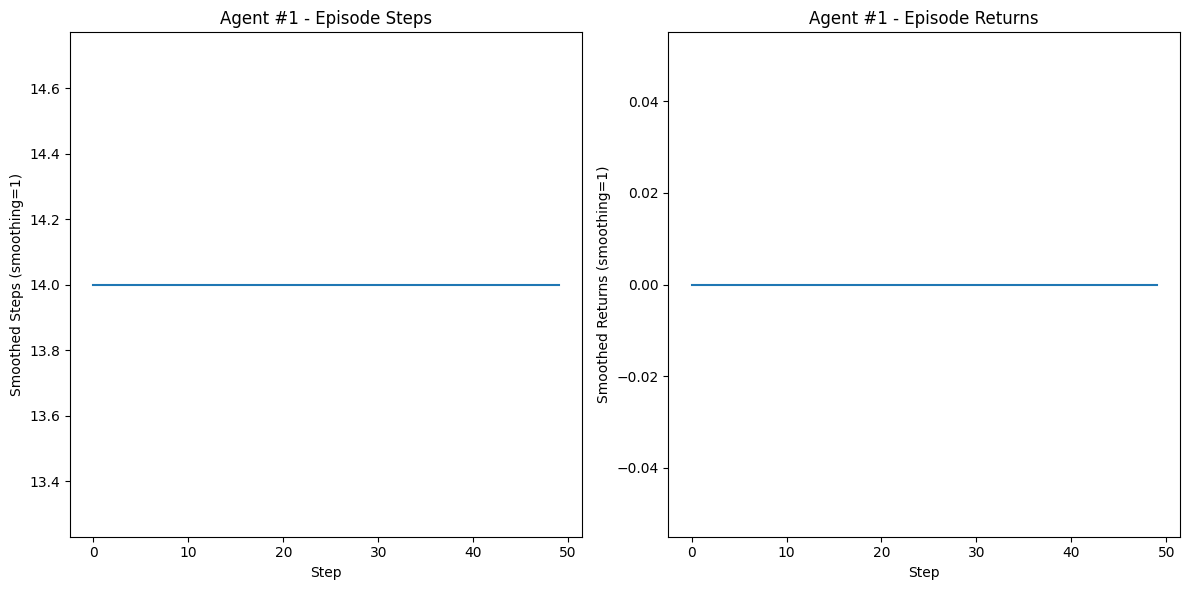

In [9]:
smoothing = 1
plot_results(results, 'Agent #1', smoothing)

In [10]:
double_dqn_agent = Double_DQN_Agent({
  "num_obs": num_obs,
  "num_actions": num_actions,
  "learning_rate": 0.05,
  "discount_factor": 0.9,
  "exploration_factor": 0.2
})

In [11]:
double_results = handler.train([double_dqn_agent], env)

~~~ Training Agent 1 1/1 ~~~
	Episode 0/50 0%
	Episode 5/50 10%
	Episode 10/50 20%
	Episode 15/50 30%
	Episode 20/50 40%
	Episode 25/50 50%
	Episode 30/50 60%
	Episode 35/50 70%
	Episode 40/50 80%
	Episode 45/50 90%
	Episode 50/50 100%

Done training!




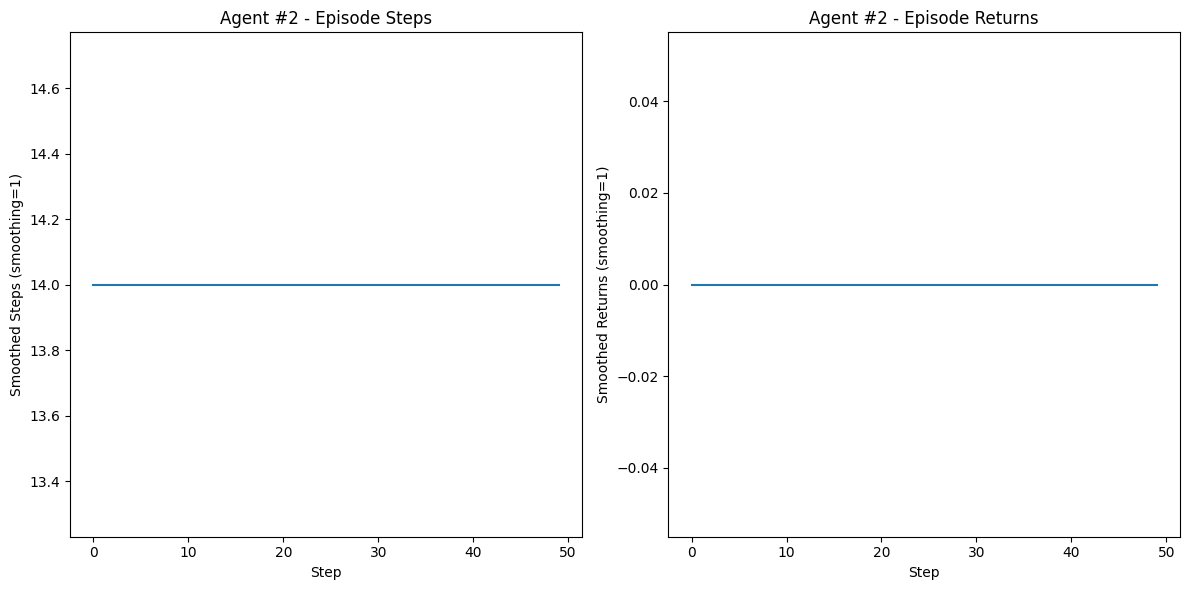

In [12]:
smoothing = 1
plot_results(double_results, 'Agent #2', smoothing)